In [202]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [203]:
def checkIntersection(s1, s2):
    s1vec = s1[1] - s1[0]
    s2vec = s2[1] - s2[0]
    s1[0] += s1vec*0.001
    s1[1] -= s1vec*0.001

    s2[0] +=s2vec*0.001
    s2[1] -=s2vec*0.001

    s1vec = s1[1] - s1[0]
    s2vec = s2[1] - s2[0]
    dist1Vec = s1[0] - s2[0]
    dist2Vec = s1[1] - s2[1]

    if ((s1vec[0]*dist1Vec[1] - s1vec[1]*dist1Vec[0])*(s1vec[0]*dist2Vec[1] - s1vec[1]*dist2Vec[0]) < -1e-6 and
        (s2vec[0]*dist1Vec[1] - s2vec[1]*dist1Vec[0])*(s2vec[0]*dist2Vec[1] - s2vec[1]*dist2Vec[0]) < -1e-6):
        return True
    elif ((s1vec[0]*dist1Vec[1] - s1vec[1]*dist1Vec[0])*(s1vec[0]*dist2Vec[1] - s1vec[1]*dist2Vec[0]) < 1e-6 and
        (s2vec[0]*dist1Vec[1] - s2vec[1]*dist1Vec[0])*(s2vec[0]*dist2Vec[1] - s2vec[1]*dist2Vec[0]) < 1e-6):
        if np.dot(s1vec, dist1Vec)*np.dot(s1vec, dist2Vec) < 1e-6:
            return True
        elif (np.dot(s1vec, dist1Vec) >= 0 and np.dot(s1vec, dist1Vec) <= np.dot(s1vec, s1vec) 
              or np.dot(s1vec, dist2Vec) <= 0 and np.dot(s1vec, dist1Vec) >= -np.dot(s1vec, s1vec)):
            return True
    return False

checkIntersection(np.array([(1,1),(2,2)], dtype='f'), np.array([(2,1),(0,0)], dtype='f'))

False

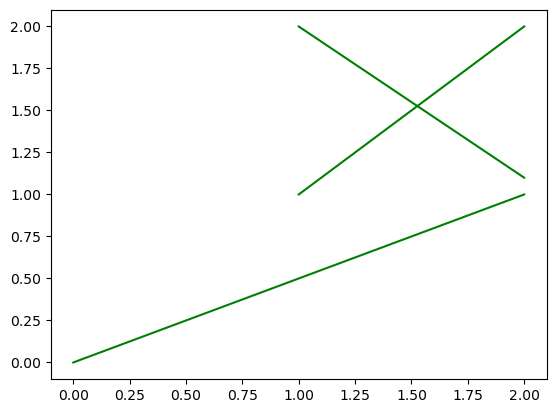

In [204]:
obstacles = (((1, 1), (2, 2)), ((2, 1), (0, 0)), ((2, 1.1), (1, 2))) # (x1, y1), (x2, y2)
def changeLineFormat(lines, intersectSet, color1, color2):
    lineList = []
    for line in lines:
        isInterecting = False
        for li in intersectSet:
            if (checkIntersection(np.array(line, dtype='f'), np.array(li, dtype='f'))):
                isInterecting = True
        lineList += [(line[0][0], line[1][0]), (line[0][1], line[1][1]), color2 if isInterecting else color1]
    return lineList


plt.plot(*changeLineFormat(obstacles, (), 'g', 'r'))

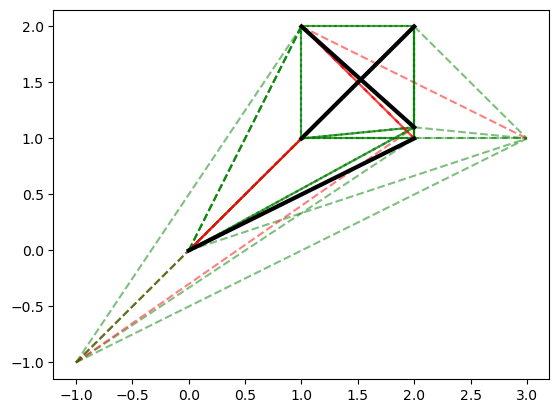

In [251]:
startPos = (-1, -1)
endPos = (3, 1)

def getAllPosibleConections(startPos, endPos, obstacles):
    lines = [(startPos, endPos)]
    for obstacle in obstacles:
        lines.append((startPos, obstacle[0]))
        lines.append((startPos, obstacle[1]))
        lines.append((obstacle[0], endPos))
        lines.append((obstacle[1], endPos))

    for i in range(len(obstacles)):
        for j in range(len(obstacles)):
            if i != j:
                lines.append((obstacles[i][0], obstacles[j][0]))
                lines.append((obstacles[i][0], obstacles[j][1]))
                lines.append((obstacles[i][1], obstacles[j][0]))
                lines.append((obstacles[i][1], obstacles[j][1]))
                lines.append((obstacles[j][0], obstacles[i][0]))
                lines.append((obstacles[j][0], obstacles[i][1]))
                lines.append((obstacles[j][1], obstacles[i][0]))
                lines.append((obstacles[j][1], obstacles[i][1]))

    return lines

possibleLines = getAllPosibleConections(startPos, endPos, obstacles)

plt.plot(*changeLineFormat(possibleLines, obstacles, 'g', 'r'), linestyle='--', alpha=0.5)
plt.plot(*changeLineFormat(obstacles, (), '#000000', '#000000'), linewidth=3)

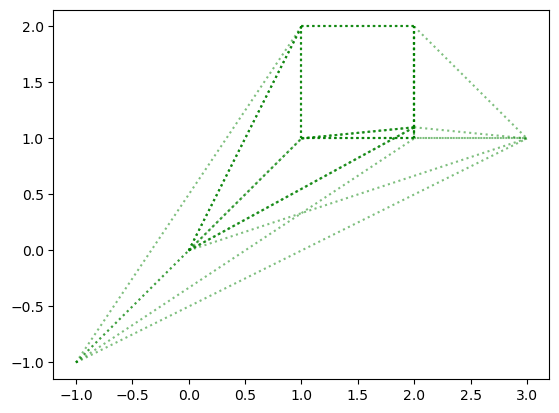

In [206]:
def notIntersectingLines(set1, set2):
    ret = []
    for line1 in set1:
        isIntersecting = False
        for line2 in set2:
            if(checkIntersection(np.array(line1, dtype='f'), np.array(line2, dtype='f'))):
                isIntersecting = True
                break
        if not isIntersecting:
            ret.append(line1)
    return ret

setOfLines = notIntersectingLines(possibleLines, obstacles)
plt.plot(*changeLineFormat(setOfLines, (), 'g', 'r'), linestyle='dotted', alpha=0.5)

In [209]:
from math import sqrt
def getWeightedEdges(set):
    res = []
    for line in set:
        res.append((line[0], line[1], sqrt((line[0][0] - line[1][0])**2 + (line[0][1] - line[1][1])**2)))
    return tuple(res)

graphEdges = getWeightedEdges(setOfLines)

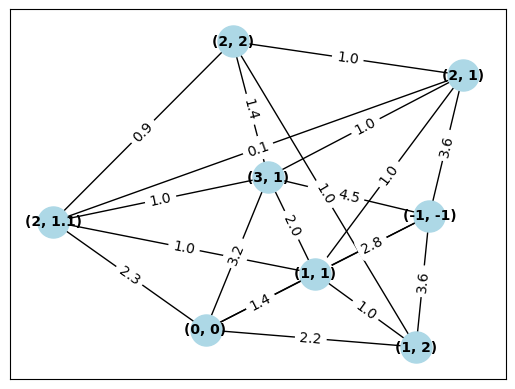

In [215]:
G = nx.Graph()
G.add_weighted_edges_from(graphEdges)

pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
labels = nx.get_edge_attributes(G, 'weight')
for label in labels:
    labels[label] = round(labels[label], 1)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

In [221]:
shortest_path_lengths, shortest_paths = nx.single_source_dijkstra(G, source=startPos)

# Mostrar las distancias más cortas
print("camino más corto desde ", startPos, "hasta ", endPos)
print(shortest_paths[(1,1)])

camino más corto desde  (-1, -1) hasta  (3, 1)
[(-1, -1), (1, 1)]


In [223]:
# Mostrar las distancias más cortas
print("caminos más cortos desde ", startPos)
for node, path in shortest_paths.items():
    print("Nodo", node, ":", path)

caminos más cortos desde  (-1, -1)
Nodo (-1, -1) : [(-1, -1)]
Nodo (3, 1) : [(-1, -1), (3, 1)]
Nodo (1, 1) : [(-1, -1), (1, 1)]
Nodo (2, 1) : [(-1, -1), (2, 1)]
Nodo (0, 0) : [(-1, -1), (0, 0)]
Nodo (1, 2) : [(-1, -1), (1, 2)]
Nodo (2, 1.1) : [(-1, -1), (0, 0), (2, 1.1)]
Nodo (2, 2) : [(-1, -1), (0, 0), (2, 1.1), (2, 2)]


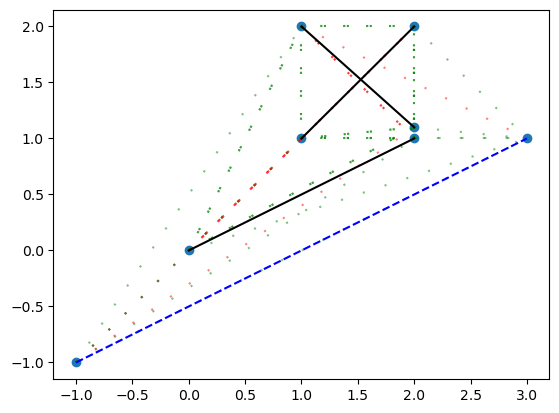

In [253]:
def convertPathToMpRedable(path):
    x = []
    y = []
    for vertex in path:
        x.append(vertex[0])
        y.append(vertex[1])
    return np.array(x), np.array(y)

plt.plot(*changeLineFormat(possibleLines, obstacles, 'g', 'r'), linestyle=(0, (1, 10)), alpha=0.5)
plt.plot(*changeLineFormat(obstacles, (), '#000000', '#000000'))
x, y = convertPathToMpRedable(shortest_paths[endPos])
plt.plot(x, y, 'b', linestyle='--')
xP, yP = convertPathToMpRedable(list(G.nodes))
plt.scatter(xP, yP)

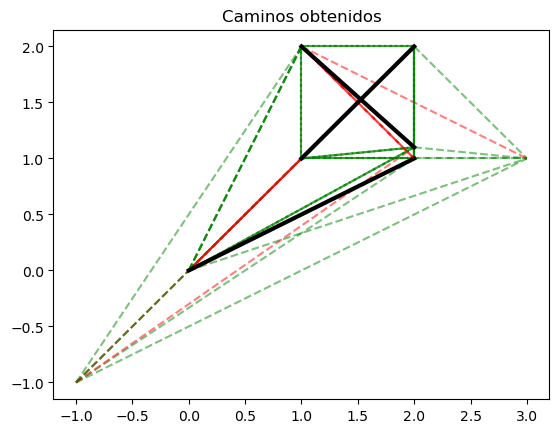

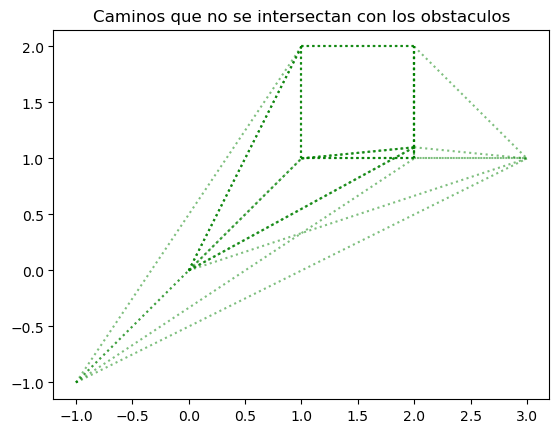

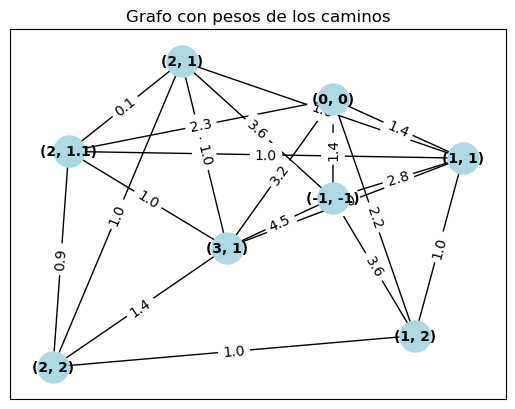

camino más corto desde  (-1, -1) hasta  (3, 1)
[(-1, -1), (1, 1)]


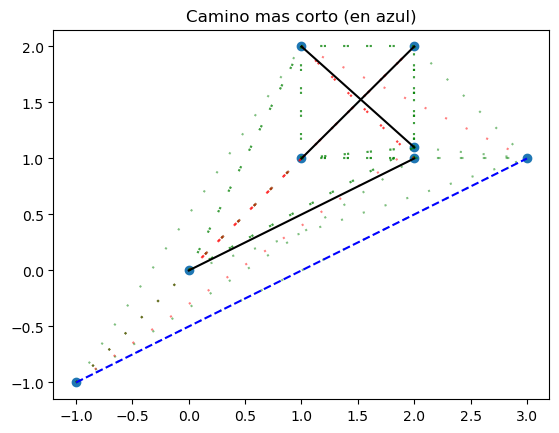

In [256]:
def getShortestPath(startPos, endPos, obstacles):
    possibleLines = getAllPosibleConections(startPos, endPos, obstacles)
    plt.plot(*changeLineFormat(possibleLines, obstacles, 'g', 'r'), linestyle='--', alpha=0.5)
    plt.plot(*changeLineFormat(obstacles, (), '#000000', '#000000'), linewidth=3)
    plt.title("Caminos obtenidos")
    plt.show()
    setOfLines = notIntersectingLines(possibleLines, obstacles)
    plt.plot(*changeLineFormat(setOfLines, (), 'g', 'r'), linestyle='dotted', alpha=0.5)
    plt.title("Caminos que no se intersectan con los obstaculos")
    plt.show()
    graphEdges = getWeightedEdges(setOfLines)
    G = nx.Graph()
    G.add_weighted_edges_from(graphEdges)

    pos = nx.spring_layout(G)
    nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
    labels = nx.get_edge_attributes(G, 'weight')
    for label in labels:
        labels[label] = round(labels[label], 1)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title("Grafo con pesos de los caminos")
    plt.show()
    shortest_path_lengths, shortest_paths = nx.single_source_dijkstra(G, source=startPos)
    print("camino más corto desde ", startPos, "hasta ", endPos)
    print(shortest_paths[(1,1)])
    plt.plot(*changeLineFormat(possibleLines, obstacles, 'g', 'r'), linestyle=(0, (1, 10)), alpha=0.5)
    plt.plot(*changeLineFormat(obstacles, (), '#000000', '#000000'))
    x, y = convertPathToMpRedable(shortest_paths[endPos])
    plt.plot(x, y, 'b', linestyle='--')
    xP, yP = convertPathToMpRedable(list(G.nodes))
    plt.scatter(xP, yP)
    plt.title("Camino mas corto (en azul)")
    plt.show()

getShortestPath(startPos, endPos, obstacles)